# An exploratory data analysis of House Prices

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from IPython.display import HTML, display

In [3]:
train_data = pd.read_csv('train.csv', delimiter=',').drop(['Id'], axis=1)
test_data = pd.read_csv('test.csv', delimiter=',').drop(['Id'], axis=1)

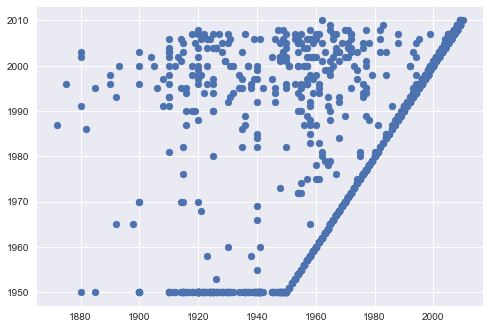

In [8]:
plt.scatter(train_data['YearBuilt'], train_data['YearRemodAdd'])
plt.show()

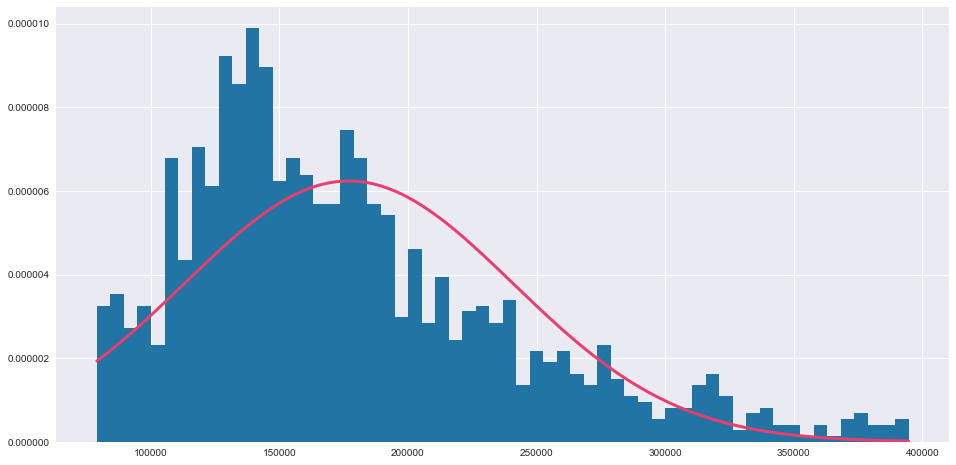

In [6]:
sales_price = train_data.sort_values(by='SalePrice').iloc[
    int(train_data.shape[0]*0.02):int(train_data.shape[0]*0.98),:]['SalePrice']
sales_price.hist(align='mid', bins=60, normed=True, color='#2274A5')
fit = stats.norm.pdf(sales_price, np.mean(sales_price), np.std(sales_price))
plt.plot(sales_price, fit, color='#E83F6F', linewidth=3)
plt.rcParams['figure.figsize'] = [16,8]
plt.show()

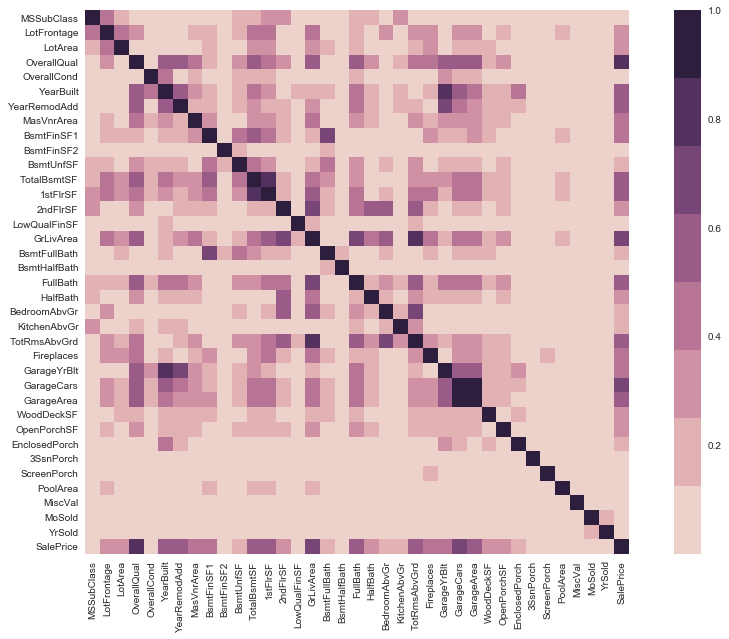

In [7]:
from matplotlib.colors import ListedColormap
f, ax = plt.subplots(figsize=(16, 10))
sale_price_corr = train_data.corr().abs()
cmap = ListedColormap(sns.cubehelix_palette(8).as_hex())
sns.heatmap(sale_price_corr, mask=np.zeros_like(sale_price_corr, dtype=np.bool),
            square=True, ax=ax, cmap=cmap)

plt.show()

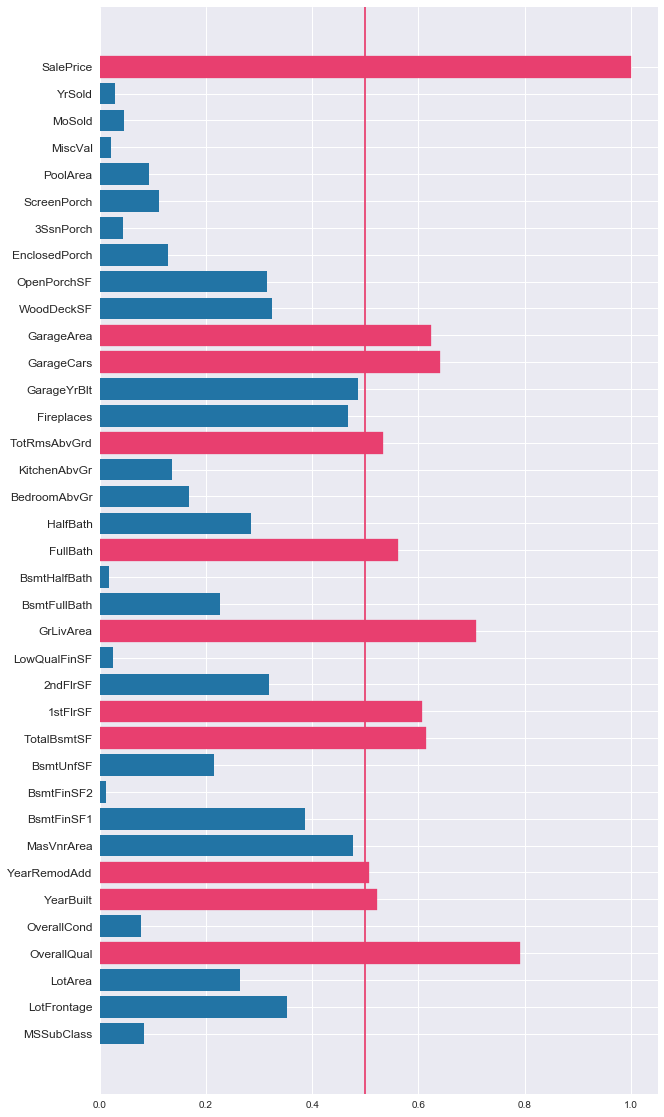

In [9]:

y = sale_price_corr['SalePrice'].values
row_names = pd.Series([row_name for row_name in sale_price_corr['SalePrice'].index])

barlist = plt.barh(np.arange(len(y)),
                  width=y,
                  tick_label=row_names, color='#2274A5')

corr_high = np.arange(len(y))[y >= 0.5]
for i in corr_high:
    barlist[i].set_color('#E83F6F')

plt.yticks(size=12)
plt.axvline(x=0.5, ymin=0, ymax=1, hold=None, color='#E83F6F')
plt.rcParams['figure.figsize'] = [10,20]
plt.show()

### Important features for sale price

In [6]:
import features

important_columns = [col for col in sale_price_corr.loc[:, sale_price_corr['SalePrice'] >= 0.5].columns]
display(HTML(
    '<h2>Important features for Sale Price'</h2>
))
display(HTML(
    '<table>{}</table>'.format(
            ''.join(['<tr><td>{}</td></tr>'.format(
                features.get_description_for_feature(row)) for row in important_columns]
            ))
    )
)

SyntaxError: invalid syntax (<ipython-input-6-c9cdabdac01e>, line 5)